In [3]:
import matplotlib.pyplot as plt
import numpy as np
def graficar_amplitud(amplitudes):
    fig, ax = plt.subplots(figsize=(6, 6)) 
    ax.bar(["000","001","010","011","100","101","110","111"],height=amplitudes,width=0.1)
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    ax.set_ylabel("Amplitud de probabilidad")

**Algoritmo de Grover**

EL objetivo del algoritmo de Grover es dada un conjunto de datos sin un orden especificado y dentro de esos datos encontrar un valor $w$ dado, en este caso el conjunto de datos son representados por los estados base de un estado $|s\rangle$ con $N$ qubits. El total conjunto de datos posible para $|s\rangle$ es de $2^{N}$. dicho conjunto de datos está acompañado por una amplitud de probabilidad dada. El fin del algoritmo es encontrar el dato $w$ representado como $|w\rangle$ y esto es posible aumentando el valor de la amplitud de probabilidad de acompaña a $|w\rangle$ y disminuir a los demás tal que al medir, dicho estado $|w\rangle$ sea medido más que los demás $2^{N}-1$ estados base. Dado el caso que la amplitud de probabilidad sea $0$, es decir, que ese dato no se encuentra dentro ese conjunto de datos, nunca aparecerá con el algoritmo.
Podemos ver ilustrativamente lo que hace el algoritmo:
Sea $|s\rangle$ el siguente estado con equiprobabilidad:
\begin{equation}
|s\rangle=\frac{|000\rangle+|001\rangle+|010\rangle+|011\rangle+|100\rangle+|101\rangle+|110\rangle+|111\rangle}.{\sqrt{8}}
\end{equation}
Para simplificar los calculos llamaremos al estado $|w^{\perp}\rangle$ a todos los estados base que no deseamos buscar, en este caso nos enfocaremos en encontrar el estado $|w\rangle= |001\rangle$. Con lo anterior, se puede escribir $|s\rangle$ como:
\begin{equation}
|s\rangle = \frac{\sqrt{7}|w^{\perp}\rangle + |001\rangle}{\sqrt{8}},
\end{equation}
tal que, $|w^{\perp}\rangle$ es:
\begin{equation}
|w^{\perp}\rangle =\frac{|000\rangle+|010\rangle+|011\rangle+|100\rangle+|101\rangle+|110\rangle+|111\rangle}{\sqrt{7}}.
\end{equation}


Graficando amplitud de probabilidad vs estados base de $|s\rangle$ se obtiene lo siguente:

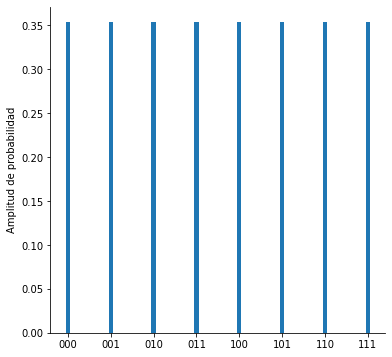

In [4]:
a=[1/np.sqrt(8),1/np.sqrt(8),1/np.sqrt(8),1/np.sqrt(8),1/np.sqrt(8),1/np.sqrt(8),1/np.sqrt(8),1/np.sqrt(8)]
graficar_amplitud(a)
plt.show()

Donde todos contienen la misma amplitud de probabilidad. Ahora deseamos encontrar por ejemplo $001$ que se relaciona con $|001\rangle$. Inicialmente el algoritmo de grover propone lo siguente: Al estado $|s\rangle$ le cambiamos el signo al estado $|10\rangle$ es decir $|001\rangle\to-|001\rangle$, esto es hecho mediante el siguente oráculo $\textbf{U}_{f_{0}}$:
\begin{equation}
\textbf{U}_{f_{0}}= \textbf{I}-2|w\rangle\langle w|,
\end{equation}
que en este caso $w=001$, tal que:
\begin{equation}
\textbf{U}_{f_{0}}= \textbf{I}-2|001\rangle\langle 001|.
\end{equation}

Al operar de la siguente manera: $\textbf{U}_{f_{0}}|s\rangle$ 
\begin{equation}
\textbf{U}_{f_{0}}|s\rangle = \frac{\sqrt{7}\left(\textbf{I}-2|001\rangle\langle 001|\right)|w^{\perp}\rangle + \left(\textbf{I}-2|001\rangle\langle 001|\right)|001\rangle}{\sqrt{8}},
\end{equation}

\begin{equation}
\textbf{U}_{f_{0}}|s\rangle = \frac{\sqrt{7}\left(\textbf{I}|w^{\perp}\rangle-2|001\rangle\langle 001|w^{\perp}\rangle\right) + \left(\textbf{I}|001\rangle-2|001\rangle\langle 001|001\rangle\right)}{\sqrt{8}}.
\end{equation}
Dado que $|w^{\perp}\rangle$ son todos los estados base distintos a $|001\rangle$,entonces $\langle 001|w^{\perp}\rangle=0$ y $\langle 001|001\rangle=1$, debido a la ortonormalidad de los estados base. Con lo cual:

\begin{equation}
\textbf{U}_{f_{0}}|s\rangle = \frac{\sqrt{7}|w^{\perp}\rangle + \left(|001\rangle-2|001\rangle\right)}{\sqrt{8}}.
\end{equation}

\begin{equation}
\textbf{U}_{f_{0}}|s\rangle = \frac{\sqrt{7}|w^{\perp}\rangle-|001\rangle}{\sqrt{8}}.
\end{equation}
Con lo anterior, logramos efectivamente cambiar de signo el estado que queremos buscar, tal que, al graficar las amplitudes de probabilidad del resultado de $\textbf{U}_{f_{0}}|s\rangle$, se obtiene:


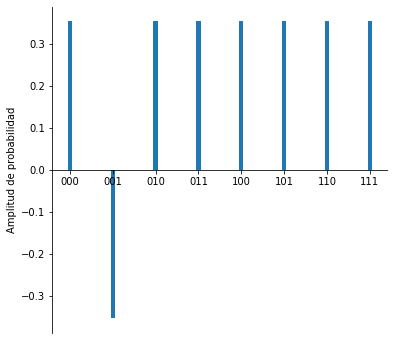

In [100]:
a=[1/np.sqrt(8),-1/np.sqrt(8),1/np.sqrt(8),1/np.sqrt(8),1/np.sqrt(8),1/np.sqrt(8),1/np.sqrt(8),1/np.sqrt(8)]
graficar_amplitud(a)
plt.show()

Como se observa en la gráfica anterior, solo la amplitud de probabilidad sufre un cambio de signo, pero al obtener el cuadrado del amplitud de probabilidad, qeu es la probabilidad de medir dicho estado, no sufre ningún cambio.

Ahora construimos un nuevo operador  que se llamará oráculo $\textbf{V}$ el cuál operará sobre el estado $\textbf{U}_{f_{0}}|s\rangle$ y cambiará el signo $|x\rangle$ diferente al estado $|s\rangle$, es decir  $|x\rangle\to-|x\rangle$, para todo estado estado $|s\rangle$ diferente a $|x\rangle$ no hará ningún cambio, tal que, $|s\rangle\to|s\rangle$. Con lo cual, análogo a $\textbf{U}_{f_{0}}$, $\textbf{V}$ es definido como: 

\begin{equation}
\textbf{V}= 2|s\rangle\langle s|-\textbf{I}.
\end{equation}
al operar $\textbf{V}\textbf{U}_{f_{0}}|s\rangle$, se tiene que:
\begin{equation}
\textbf{V}\textbf{U}_{f_{0}}|s\rangle = \frac{\sqrt{7}\left(2|s\rangle\langle s|-\textbf{I}\right)|w^{\perp}\rangle-\left(2|s\rangle\langle s|-\textbf{I}\right)|001\rangle}{\sqrt{8}},
\end{equation}

\begin{equation}
\textbf{V}\textbf{U}_{f_{0}}|s\rangle = \frac{\sqrt{7}\left(2|s\rangle\langle s|w^{\perp}\rangle-|w^{\perp}\rangle\right)-\left(2|s\rangle\langle s|001\rangle-|001\rangle\right)}{\sqrt{8}}.
\end{equation}

Calculando $\langle s|w^{\perp}\rangle$, se tiene que:

\begin{equation}
\langle s|w^{\perp}\rangle = \frac{\sqrt{7}\langle w^{\perp}|w^{\perp}\rangle + \langle 001|w^{\perp}\rangle}{\sqrt{8}},
\end{equation}
\begin{equation}
\langle s|w^{\perp}\rangle = \sqrt{\frac{7}{8}}.
\end{equation}
Ahora, calculando $\langle s|001\rangle$ se tiene lo siguente:
\begin{equation}
\langle s|001\rangle = \frac{\sqrt{7}\langle w^{\perp}|001\rangle + \langle 001|001\rangle}{\sqrt{8}},
\end{equation}
\begin{equation}
\langle s|001\rangle = \frac{1}{\sqrt{8}}.
\end{equation}

Reemplazando $\langle s|w^{\perp}\rangle$ y $\langle s|001\rangle$ en $\textbf{V}\textbf{U}_{f_{0}}|s\rangle$, se tiene que:
\begin{equation}
\textbf{V}\textbf{U}_{f_{0}}|s\rangle = \frac{\sqrt{7}\left(2\sqrt{\frac{7}{8}}|s\rangle-|w^{\perp}\rangle\right)-\left(2\frac{1}{\sqrt{8}}|s\rangle-|001\rangle\right)}{\sqrt{8}},
\end{equation}


\begin{equation}
\textbf{V}\textbf{U}_{f_{0}}|s\rangle = \frac{\left(\frac{2\times 7}{\sqrt{8}}-\frac{2}{\sqrt{8}}\right)|s\rangle-\sqrt{7}|w^{\perp}\rangle+|001\rangle}{\sqrt{8}},
\end{equation}
\begin{equation}
\textbf{V}\textbf{U}_{f_{0}}|s\rangle = \frac{\left(\frac{2\times 7}{\sqrt{8}}-\frac{2}{\sqrt{8}}\right)|s\rangle-\sqrt{7}|w^{\perp}\rangle+|001\rangle}{\sqrt{8}},
\end{equation}

\begin{equation}
\textbf{V}\textbf{U}_{f_{0}}|s\rangle = \frac{\frac{12}{\sqrt{8}}|s\rangle-\sqrt{7}|w^{\perp}\rangle+|001\rangle}{\sqrt{8}}.
\end{equation}
\begin{equation}
\textbf{V}\textbf{U}_{f_{0}}|s\rangle = \frac{\frac{12}{\sqrt{8}}\left(\frac{\sqrt{7}|w^{\perp}\rangle + |001\rangle}{\sqrt{8}}\right)-\sqrt{7}|w^{\perp}\rangle+|001\rangle}{\sqrt{8}}.
\end{equation}

\begin{equation}
\textbf{V}\textbf{U}_{f_{0}}|s\rangle = \frac{\frac{12\times\sqrt{7}}{8}|w^{\perp}\rangle + \frac{12}{8}|001\rangle-\sqrt{7}|w^{\perp}\rangle+|001\rangle}{\sqrt{8}}.
\end{equation}

\begin{equation}
\textbf{V}\textbf{U}_{f_{0}}|s\rangle = \frac{\frac{4\times\sqrt{7}}{8}|w^{\perp}\rangle + \frac{20}{8}|001\rangle}{\sqrt{8}}.
\end{equation}
Para detallar el resultado anterior se graficará los estados base de $\textbf{V}\textbf{U}_{f_{0}}|s\rangle$ tal que se obtiene:

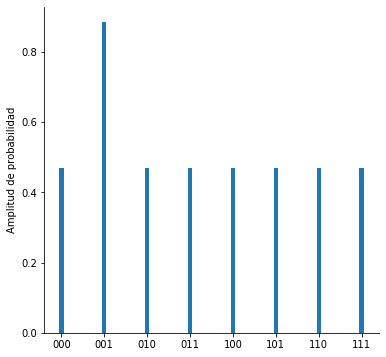

In [9]:
a=[(4*np.sqrt(7))/(8*np.sqrt(8)),20/(8*np.sqrt(8)),(4*np.sqrt(7))/(8*np.sqrt(8)),(4*np.sqrt(7))/(8*np.sqrt(8)),(4*np.sqrt(7))/(8*np.sqrt(8)),(4*np.sqrt(7))/(8*np.sqrt(8)),(4*np.sqrt(7))/(8*np.sqrt(8)),(4*np.sqrt(7))/(8*np.sqrt(8))]
graficar_amplitud(a)
plt.show()

Con lo cual, se observa que lo que hace  $\textbf{V}$, luego de cambiar de signo a estado a buscar, lo que hace es volver nuevamente a estado base original, es decir, cambiar de signo de nuevo.Ademas, aumenta el valor de amplitud de probabilidad del estado el cual estamos buscando y los demás estados les disminuye el valor de amplitud de probabilidad, esto con el objetivo de la suma del cuadrado de las amplitudes de probabilidad siga siendo igual a $1$. Si volvemos a aplicar la anterior metodología $M$ veces, aumentaremos la probabilidad de medir $001$, tal que, al medir una vez va ser demasiado probable que obtengamos el valor que buscabamos. El caso anterior es aplicado para $3$ qubits, para el caso de $N$ qubits se tiene que $|s\rangle$ se escribe como:

\begin{equation}
|s\rangle = \frac{\sqrt{2^{N}-1}|w^{\perp}\rangle + |w\rangle}{\sqrt{2^{N}}},
\end{equation}
donde $|w\rangle$ al estado base que deseamos buscar, $|w^{\perp}\rangle$ los demás estados base perpendiculares a
$|w^{\perp}\rangle$ y $2^N$ todos los estados base que contiene $|s\rangle$. En este caso para $N$ qubits usamos exactamente el mismo proceso que lo hicimos en el anterior ejemplo: es decir:
1. Preparar el estado $|s\rangle$.
2. Aplicar la compuerta $\textbf{U}_{f_{o}}$.
3. Aplicar la compuerta $\textbf{V}$.
4. Repetir el paso 2 y 3 un total de $R$ veces.
En este caso existe una formula la cual no se demostrará acá de cuántas veces aproximadamente debemos aplicar el paso 2 y el paso 3
\begin{equation}
R = \left\lfloor  \frac{\pi}{4}\sqrt{2^n} \right\rfloor,
\end{equation}
donde $n$ es el número de qubits y $\left\lfloor \cdot \right\rfloor$ aproxima el valor decimal obtenido a un valor entero cercano a ese decimal. Para el ejemplo con 3 qubits antes visto, para obtener una busqueda óptima entonces las veces de aplicar los dos operadores son de $R=2$.

**Construcción del oráculo $\textbf{U}_{f_{o}}$**

Se sabe que el objetivo de oráculo $\textbf{U}_{f_{o}}$ es cambiar de signo al estado $|w\rangle$ que se desea buscar. Tal que al aplicar  $\textbf{U}_{f_{o}}$ a $|s\rangle$ se tiene que:

\begin{equation}
\textbf{U}_{f_{o}}|s\rangle = \frac{\sqrt{2^{N}-1}|w^{\perp}\rangle - |w\rangle}{\sqrt{2^{N}}},
\end{equation}
se sabe que $|w^{\perp}\rangle$ son todos los estados ortogonales a $|w\rangle$, tal que:
\begin{equation}
|w^{\perp}\rangle = \sum_{\forall x / \; x \neq w}|x\rangle,
\end{equation}
donde x puede tomar en total $2^n-1$ valores posible, es decir, de los $n$ qubits tenemos $2^n$ estados base, donde, el que queremos buscar es $1$ estado base en concreto e ignorar los $2^n-1$ estados base restantes.
Con lo anterior se puede construir la siguiente función $f(x)$:
\begin{equation}
f(x)= \left\{ \begin{array}{lcc}
             1 &   si &  x \neq w
             \\ -1 &  si & x = w
             \end{array}
   \right.
\end{equation}
Dicha funcion construye la siguente matriz de tamaño $2^n\times2^n$ tal que:

\begin{equation}
\textbf{U}=\begin{bmatrix}
                    f(x_{1}) & 0 & 0 & 0\\
                    0 & f(x_{2}) & 0 & 0\\
                    \vdots & \vdots & \ddots & \vdots\\
                    0 & 0 & \dots & f(x_{2^n})\\
                \end{bmatrix}.
\end{equation}
tal que, al aplicarla sobre $|s\rangle$ se obtiene que:
\begin{equation}
\textbf{U}|s\rangle = \frac{\sqrt{2^{N}-1}|w^{\perp}\rangle - |w\rangle}{\sqrt{2^{N}}}.
\end{equation}
Es decir que U únicamente cambia de signo al estado que queremos buscar, con lo cual, $\textbf{U}=\textbf{U}_{f_{o}}$, es decir que, $\textbf{U}$ se comporta como el oráculo $\textbf{U}_{f_{o}}$ el cual definimos en el algoritmo de Grover. 


**Construcción del oráculo $\textbf{V}$**

Se tiene el estado $|s\rangle$ con $n$ qubits del siguiente estado:
\begin{equation}
|s\rangle = \textbf{H}^{\otimes n}|0\rangle^{\otimes n}= \frac{1}{\sqrt{2^n}}\sum_{x=0}^{2^n-1}|x\rangle,
\end{equation}
es decir que tenemos un estado inicial de $|0\rangle^{\otimes n}$ y aplicamos la compuerta $\textbf{H}^{\otimes n}$ con el objetivo de preprarar el estado $|s\rangle$. ahora, elegimos que queremos buscar el estado $|0\rangle^{\otimes n}$, tal que para cambiarlo de signo se define $\textbf{U}_{f_{o}}$ como:
\begin{equation}
\textbf{U}_{f_{o}} = 2\left(|0\rangle^{\otimes n}\right)\left(\langle0|^{\otimes n}\right)-\textbf{I}
\end{equation}
luego aplicamos $\textbf{V}$ para ir amplificando el valor de la amplitud de probabilidad del estado $|0\rangle^{\otimes n}$ con:
\begin{equation}
\textbf{V} = \textbf{I}-2|s\rangle\langle s|.
\end{equation}
Ya se sabe construir matricialmente $\textbf{U}_{f_{o}}$, pero, aún no a $\textbf{V}$. Para poder construir el oráculo $\textbf{V}$ partimos de lo siguente: Sí a la compuerta $\textbf{H}^{\otimes n}$ la aplicamos a $-\textbf{U}_{f_{o}}$  y luego volvemos a aplicar la compuerta $\textbf{H}^{\otimes n}$ se tiene lo siguiente:
\begin{equation}
\textbf{H}^{\otimes n}\left(-\textbf{U}_{f_{o}}\right)\textbf{H}^{\otimes n} = \textbf{H}^{\otimes n}\left(\textbf{I}\right)\textbf{H}^{\otimes n}-2\textbf{H}^{\otimes n}\left(|0\rangle^{\otimes n}\right)\left(\langle0|^{\otimes n}\right)\textbf{H}^{\otimes n}
\end{equation}

\begin{equation}
\textbf{H}^{\otimes n}\left(-\textbf{U}_{f_{o}}\right)\textbf{H}^{\otimes n} = \textbf{H}^{\otimes n}\textbf{H}^{\otimes n}-2|s\rangle\langle s|,
\end{equation}
siendo $|s\rangle = \textbf{H}^{\otimes n}|0\rangle^{\otimes n}$ y $\langle s| = \langle0|^{\otimes n}\textbf{H}^{\otimes n}$, además de que $\textbf{H}^{\otimes n}$ es unitario, entonces, $\textbf{H}^{\otimes n}\textbf{H}^{\otimes n}=\textbf{I}$ con lo anterior, entonces,
\begin{equation}
\textbf{H}^{\otimes n}\left(-\textbf{U}_{f_{o}}\right)\textbf{H}^{\otimes n} = \textbf{I}-2|s\rangle\langle s|=\textbf{V},
\end{equation}
Con lo cual, mediante la compuerta $\textbf{H}^{\otimes n}$ que es aplicar la compuerta $\textbf{H}$ a cada qubit del estado inicial y mediante el oráculo $\textbf{U}_{f_{o}}$ podemos construir a $\textbf{V}$. Aahora a la hora de construir $\textbf{V}$ no importa si la construimos mediante $-\textbf{U}_{f_{o}}$ o $\textbf{U}_{f_{o}}$, esto es debido que dicho $-1$ acompañado de  $\textbf{U}_{f_{o}}$ se comporta como una fase que no afecta el resultado, tal que, a la hora de construir la matriz nos podemos valer de:
\begin{equation}
\textbf{V}=\textbf{H}^{\otimes n}\left(\textbf{U}_{f_{o}}\right)\textbf{H}^{\otimes n}
\end{equation}. 
Ahora en este caso $\textbf{U}_{f_{o}}$ tiene una construicción peculiar, se tiene en cuenta que para construir $\textbf{V}$ se decidió buscar el estado inicial $|0\rangle^{\otimes n}$, con esto se quiere decir que el $f(x)$ que construye a $\textbf{U}_{f_{o}}$ para obtener $\textbf{V}$ es:
\begin{equation}
f(x)= \left\{ \begin{array}{lcc}
             1 &   si &  x \neq 000...0 
             \\ -1 &  si & x = 000...0
             \end{array}
   \right.
\end{equation}
tal que $\textbf{U}_{f_{o}}$ de tamaño $2^{n}\times2^{n}$ es:
\begin{equation}
\textbf{U}_{f_{0}}=\begin{bmatrix}
                    -1 & 0 & \dots & 0\\
                    0 & 1 & \dots & 0\\
                    \vdots & \vdots & \ddots & \vdots\\
                    0 & 0 & \dots & 1\\
                \end{bmatrix},
\end{equation} siendo el primer elemento de la diagonal $-1$ y los demás elementos de la diagonal $1$. 
Con lo anteriormente explicado ya podemos construir el código con el algoritmo de Grover.

Inicialmente llamamos a los paquetes que usaremos en el código en este caso añadimos una nueva función llamada **Operator()**, la cual, convierte una matriz cuadrada generada en numpy y construida por el usuario a un operador que puede aplicarse al un circuito cuántico, el primer parámetro de entrada es la matriz a convertir, y el segundo parámetro es un tupla con todos los qubits a la cual se le van a aplicar.

In [59]:
import numpy as np
from qiskit import *
from qiskit.visualization import *
from qiskit.quantum_info import Statevector, Operator    

Teniendo en cuenta lo anterior se construye el oráculo $\textbf{U}_{f_{o}}$ mediante el método **identity()** el cual genera una matriz identidad cuadada de $2^n$, siendo n el número de qubits a usar en el circuito, luego cambiamos el signo al elemento elegido de matriz, luego convertimos dicha matriz en operador y luego la aplicamos a un placeholder de circuito, tal que tengamos de salida un placeholder del operado para aplicar a nuestro circuito de interés.

In [60]:
def oraculo_f_o(n_qubits, buscar):
    
    qc = QuantumCircuit(n_qubits,name="$U_{f_{o}}$")
    
    matriz = np.identity(2**n_qubits)
    
    matriz[buscar, buscar] = -1
    
    compuerta_oraculo = Operator(matriz)
    qc.unitary(compuerta_oraculo,range(n_qubits))
    
    return qc

Ahora se construye el oráculo $\textbf{V}$, el único valor de entrada que necesitamos son los números de qubits a usar, la construicción de este oráculo es sencilla, primero aplicamos la compuerta Hadamard a todos los qubits, luego aplicamos el oráculo $\textbf{U}_{f_{o}}$, en este caso la entrada de  "busqueda" de oráculo es siempre $0$, finalmente aplicamos nuevamente la compuerta Hadamard.

In [61]:
def oraculo_v(n_qubits):
    
    qc = QuantumCircuit(n_qubits, name="$V$")
    qc.h(range(n_qubits))
    qc.append(oraculo_f_o(n_qubits, [0]), range(n_qubits))
    qc.h(range(n_qubits))
    return qc

Luego de determinadas las funciones anteriores, generamos un circuito inicial de $n$ qubits, luego calculamos el número de repeticiones necesarias para que el algoritmo sea efectivo finalmente mediante **for** aplicamos $\textbf{V}\textbf{U}_{f_{o}}$, $R$ veces. el símbolo $\_$ escrito despues de **for** indica que no usaremos un iterador **i** si no ejecutaremos un código específico una cantidad de $R$ veces sin necesitar el iterador.
en este caso se escogera el número de qubits como 7 y deseamos buscar a $1111111$ que esta asociado a $|1111111\rangle$ es decir que buscamos a el último estado base es decir el estado $2^7-1$, dicha resta se debe a que la posición empieza en $0$ y no en $1$ de los estados base totales.

R = 9


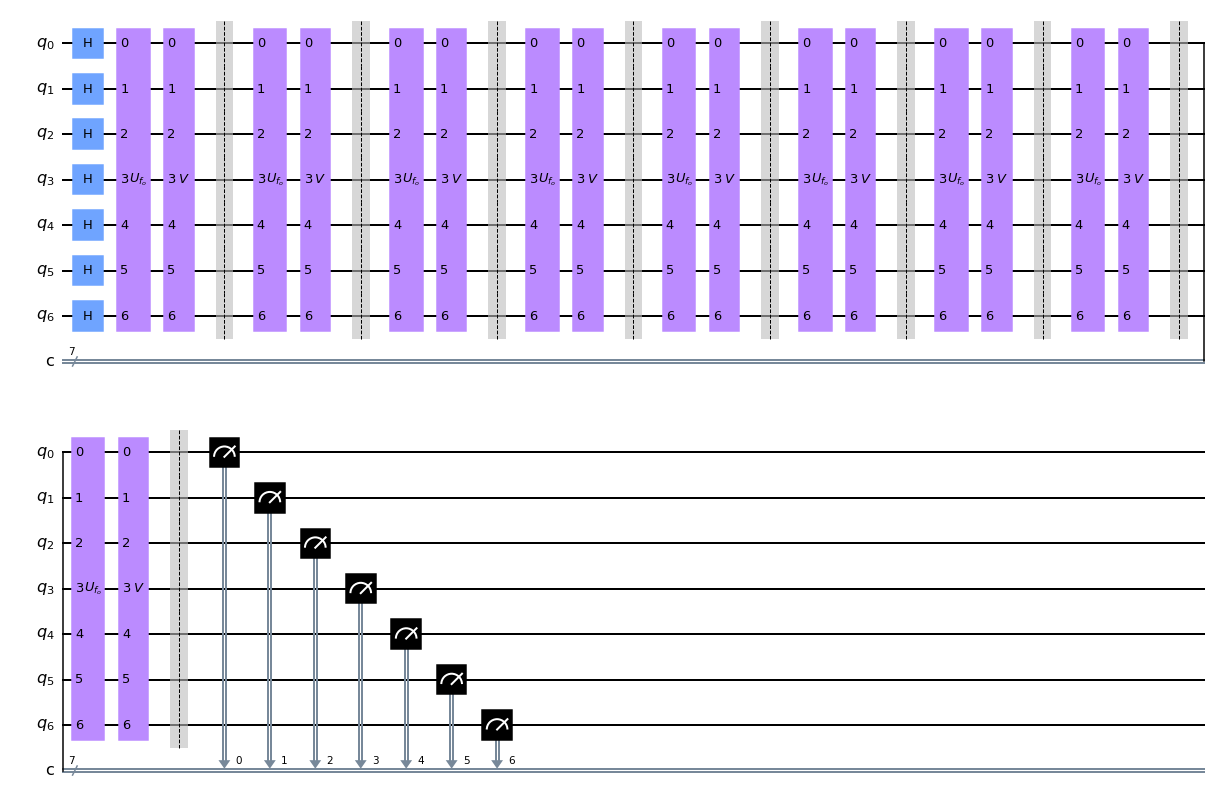

In [68]:
n = 7
buscar = (2**n)-1
q = QuantumCircuit(n,n) #n qubits iniciales y n cbi
q.h(range(n)) # preparamos el estado |s>

R = round((np.pi/4)*np.sqrt(2**n)) #calculamos el número de repeticiones
print("R =",R)
for _ in range(R):
    q.append(oraculo_f_o(n,buscar),range(n))
    q.append(oraculo_v(n), range(n))
    q.barrier()
    
q.measure(range(n), range(n))
q.draw("mpl")   

Luego de creado el circuito cuántico, se simula de la siguente forma.

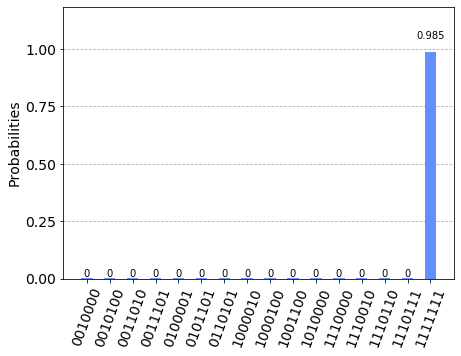

In [74]:
aer_sim = Aer.get_backend('aer_simulator')
qobj = transpile(q, aer_sim) # para evitar problemas con el código corremos el transpile para asocial el simulador con el circuito
results = aer_sim.run(qobj).result()
conteo = results.get_counts()
plot_histogram(conteo)

Con esto vemos que efectivamente se puede encontrar $1111111$ con una probabilidad del $98.5\%$